Ques1. Import the gold csv file, which contains data set of last two years price action of Indian (MCX) gold standard.
You will notice two columns: pred and new, one of the two columns is a linear combination of the OHLC prices with varying coefficients while other is a polynomial function of the same inputs. Also, one of the two columns are partially filled.

    Using linear regression, find the coefficients of the inputs and using the same trained model, complete the entire column.
    
    Also, try to fit the other column as well using a new linear regression model. Check if the predictions are accurate. Mention which column is linear and which is polynomial.

In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Administrator\Desktop\Gold.csv')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [2]:
df.tail()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
507,"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,NaN,247.177322
508,"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,NaN,52.201158
509,"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,NaN,113.293305
510,"May 02, 2019",31203,31420,31425,31160,0.48K,-1.14%,NaN,48.365693
511,"May 03, 2019",31341,31250,31500,31163,0.08K,0.44%,NaN,429.924911


In [4]:
df['Date']= pd.to_datetime(df['Date'])

In [5]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,2017-05-04,28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,2017-05-05,28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,2017-05-08,28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,2017-05-09,27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,2017-05-10,28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [8]:
index = df[df['Pred'].isna()].index
index

Int64Index([411, 412, 413, 414, 415, 416, 417, 418, 419, 420,
            ...
            502, 503, 504, 505, 506, 507, 508, 509, 510, 511],
           dtype='int64', length=101)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [12]:
lr = LinearRegression()

In [21]:
x = df.iloc[0:index[0]:,0:5]
x

,Date,Price,Open,High,Low
0,2017-05-04,28060,28400,28482,28025
1,2017-05-05,28184,28136,28382,28135
2,2017-05-08,28119,28145,28255,28097
3,2017-05-09,27981,28125,28192,27947
4,2017-05-10,28007,28060,28146,27981
...,...,...,...,...,...
406,2018-12-04,30964,30874,31085,30874
407,2018-12-05,30926,30830,30970,30825
408,2018-12-06,31005,31039,31196,30974
409,2018-12-07,31440,31011,31480,30941


In [22]:
y = df.iloc[0:index[0],7]
y

0      738.0
1     -146.0
2       30.0
3      357.0
4      124.0
       ...  
406    -31.0
407     72.0
408     35.0
409    669.0
410    521.0
Name: Pred, Length: 411, dtype: float64

In [23]:
x_pred = df.iloc[index[0]:,1:5]
x_pred

,Price,Open,High,Low
411,31812,31850,31850,31618
412,31626,31749,31749,31582
413,31414,31550,31600,31337
414,31437,31440,31514,31384
415,31501,31369,31530,31291
...,...,...,...,...
507,31868,31851,31934,31705
508,31625,31800,31824,31597
509,31563,31604,31657,31503
510,31203,31420,31425,31160


In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 2)
x_train2 = x_train.iloc[:,1:5]
x_test2 = x_test.iloc[:,1:5]
lr.fit(x_train2,y_train)
pred_test_ = lr.predict(x_test2)

In [27]:
lr.coef_

array([ 2.,  3., -1., -4.])

In [28]:
lr.intercept_

9.157474778476171e-11

In [30]:
from sklearn.metrics import r2_score
print('R2 Score is:',r2_score(y_test,pred_test_))

R2 Score is: 1.0


In [31]:
from sklearn.metrics import mean_squared_error
print('RMSE:', mean_squared_error(y_test,pred_test_))

RMSE: 8.500466206710722e-22


In [33]:
df_test = x_test
df_test["Pred"] = y_test
df_test["Pred_New"] = pred_test_
df_test = df_test.reset_index()
df_test = df_test.sort_values(by=["index"])
df_test = df_test.set_index("index")
df_test = df_test.set_index("Date")
df_test

C:\Users\Administrator\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Administrator\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Price,Open,High,Low,Pred,Pred_New
Date,,,,,,
2017-05-08,28119,28145,28255,28097,30.0,30.0
2017-05-15,28008,28049,28157,27996,22.0,22.0
2017-05-29,28874,28843,28928,28807,121.0,121.0
2017-06-01,28749,28877,28877,28712,404.0,404.0
2017-06-07,29376,29439,29485,29310,344.0,344.0
...,...,...,...,...,...,...
2018-11-20,30830,30811,30994,30800,-101.0,-101.0
2018-11-23,30513,30551,30566,30427,405.0,405.0
2018-11-29,30253,30399,30399,30210,464.0,464.0


In [34]:
predictions = lr.predict(x_pred)
predictions

array([ 852.,  422.,  530.,  144.,  415., 1103.,  411.,  613.,    5.,
        547.,  -27.,  368.,  263.,  615.,  479.,  -82.,  489., 2890.,
        340.,  274.,  469.,  487.,  -48.,  364.,    7.,  277.,  283.,
        550.,  110.,  413.,  146.,  241.,  406.,  119.,  405.,  303.,
        154.,  679., 2111.,  860.,  -37.,  615.,  468.,  716.,  410.,
        251.,  466.,  254.,  109.,  470.,  241.,  776.,  471.,  555.,
       -139.,  224.,  603., 3024.,  331., 2895.,  476.,  589.,  233.,
        670.,  152.,   32.,  960.,  359.,  595.,  439.,  586.,   93.,
        741.,  466.,  502.,  159.,  833.,  378.,    6.,  694.,  518.,
        554.,  517.,  202.,  338.,  489., 1070.,   -8.,  579.,  468.,
        223.,  264., -132.,  350.,  359.,  446.,  535.,  438.,  269.,
        601.,  280.])

In [35]:
x_pred["predictions"] = predictions
x_pred

,Price,Open,High,Low,predictions
411,31812,31850,31850,31618,852.0
412,31626,31749,31749,31582,422.0
413,31414,31550,31600,31337,530.0
414,31437,31440,31514,31384,144.0
415,31501,31369,31530,31291,415.0
...,...,...,...,...,...
507,31868,31851,31934,31705,535.0
508,31625,31800,31824,31597,438.0
509,31563,31604,31657,31503,269.0
510,31203,31420,31425,31160,601.0


In [36]:
# To complete the column of Pred Column in the original data frame.
predictions = predictions.round(2)
y = list(y)
predictions = list(predictions)
y.extend(predictions)
df["Pred"] = y

In [37]:
df.tail()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
507,2019-04-26,31868,31851,31934,31705,9.67K,0.08%,535.0,247.177322
508,2019-04-30,31625,31800,31824,31597,6.44K,-0.76%,438.0,52.201158
509,2019-05-01,31563,31604,31657,31503,1.55K,-0.20%,269.0,113.293305
510,2019-05-02,31203,31420,31425,31160,0.48K,-1.14%,601.0,48.365693
511,2019-05-03,31341,31250,31500,31163,0.08K,0.44%,280.0,429.924911


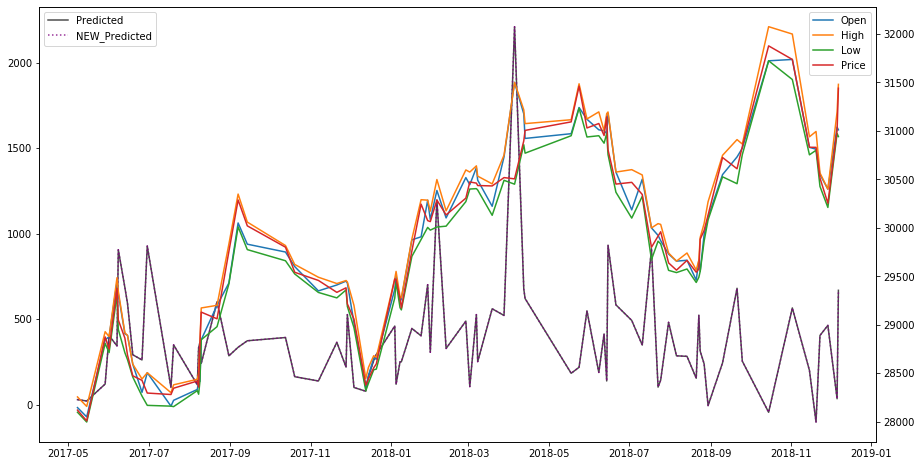

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig = plt.figure(figsize = (15, 8))
ax1 = fig.add_subplot(1,1,1)
ax2 = ax1.twinx()

ax2.plot(df_test["Open"], label="Open")
ax2.plot(df_test["High"], label="High")
ax2.plot(df_test["Low"], label="Low")
ax2.plot(df_test["Price"], label="Price")

ax1.plot(df_test["Pred"], label = "Predicted", color = "black", linestyle = "solid", alpha = 0.7)
ax1.plot(df_test["Pred_New"], label = "NEW_Predicted", color = "purple", linestyle = "dotted", alpha = 0.8)
ax1.legend(loc = "upper left")
ax2.legend(loc = "upper right")

In [52]:
df

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,2017-05-04,28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,2017-05-05,28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,2017-05-08,28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,2017-05-09,27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,2017-05-10,28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...,...
507,2019-04-26,31868,31851,31934,31705,9.67K,0.08%,535.0,247.177322
508,2019-04-30,31625,31800,31824,31597,6.44K,-0.76%,438.0,52.201158
509,2019-05-01,31563,31604,31657,31503,1.55K,-0.20%,269.0,113.293305
510,2019-05-02,31203,31420,31425,31160,0.48K,-1.14%,601.0,48.365693


In [53]:
#to apply on column new
X = df.iloc[:, 0:5]
Y = df.iloc[:, 8]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)
X_train_2 = X_train.iloc[:, 1:5]
X_test_2 = X_test.iloc[:, 1:5]

In [54]:
# Now applying linear regression : 
lr.fit(X_train_2, Y_train)
new_pred_lr = lr.predict(X_test_2)
r2_score(Y_test, new_pred_lr)

0.9999916114573493

In [55]:
from sklearn.preprocessing import PolynomialFeatures
# Now applying Polynomial Regression to get a more accurate score :
Polynomial = PolynomialFeatures(degree = 2)
X_poly = Polynomial.fit_transform(X_train_2)
#Polynomial.fit(X_poly, Y_train) 
lr = LinearRegression()
lr.fit(X_poly, Y_train)
new_pred_poly = lr.predict(Polynomial.fit_transform(X_test_2))

In [56]:
r2_score(Y_test, new_pred_poly)

0.9999999902555515

In [57]:
df_new = X_test
df_new["new"] = Y_test
df_new["new_Linear"] = new_pred_lr
df_new["new_Poly"] = new_pred_poly
df_new = df_new.reset_index()
df_new = df_new.sort_values(by=["index"])
df_new = df_new.set_index("index")
df_new = df_new.set_index("Date")
df_new

C:\Users\Administrator\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Administrator\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Administrator\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

,Price,Open,High,Low,new,new_Linear,new_Poly
Date,,,,,,,
2017-05-05,28184,28136,28382,28135,295.430176,295.447631,295.417024
2017-05-10,28007,28060,28146,27981,112.153318,111.690458,112.123883
2017-05-11,28022,27995,28100,27945,182.427089,182.324262,182.420361
2017-05-12,28019,28088,28195,27985,141.255137,141.024583,141.243358
2017-05-15,28008,28049,28157,27996,120.069010,119.493583,120.029719
...,...,...,...,...,...,...,...
2019-04-18,31403,31474,31544,31355,118.289332,117.863375,118.301035
2019-04-22,31531,31497,31697,31497,234.215894,233.773259,234.211253
2019-04-24,31759,31480,31799,31450,631.428967,632.182426,631.426240


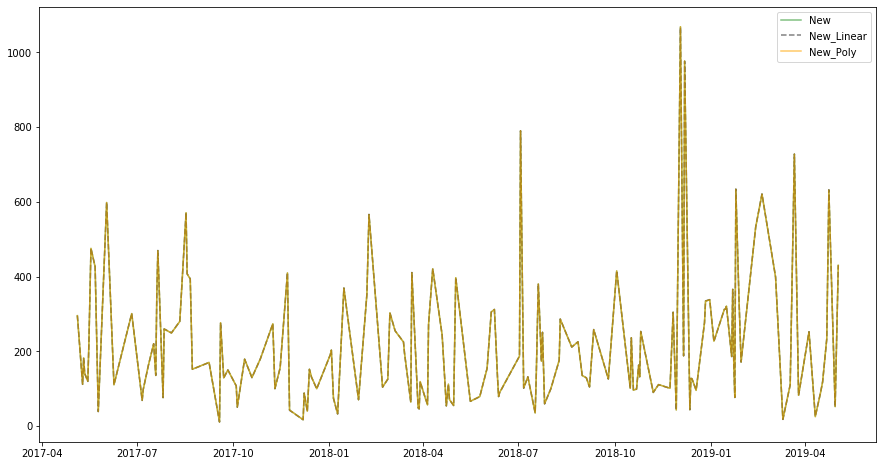

In [71]:
fig = plt.figure(figsize = (15, 8))
ax1 = fig.add_subplot(1,1,1)

ax1.plot(df_new["new"], label = "New", color = "green", linestyle = "-", alpha = 0.5)
ax1.plot(df_new["new_Linear"], label = "New_Linear", color = "black", linestyle = "dashed", alpha = 0.5)
ax1.plot(df_new["new_Poly"], label = "New_Poly", color = "orange", linestyle = "solid", alpha = 0.6)
ax1.legend(loc = "upper right")


PRED COLUMN IS LINEAR AND NEW COLUMN IS POLYNOMIAL.

Ques2. Import the stock of your choosing along with the NIFTY50 Dataset.
Using Linear Regression(OLS), calculate:

    Daily Beta Value for the last three months (Daily = Daily Returns)
    
    The monthly Beta Value
    
Refrain from using the covariance formula.
Attempt the question using regression

In [74]:
#STOCK CHOSEN IS TATA POWER
#with NIFTY INDEX
tata_df = pd.read_csv(r'C:\Users\Administrator\Desktop\TATAPOWER.csv')
tata_df['Date'] = pd.to_datetime(tata_df['Date'])

In [76]:
tata_df = tata_df.set_index('Date')

In [77]:
tata_df = tata_df[tata_df['Series'] == 'EQ']
tata_df.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,TATAPOWER,EQ,82.30,82.55,83.80,82.15,83.55,83.55,82.85,2007841,1.663515e+08,13315,796744,39.68
2017-05-16,TATAPOWER,EQ,83.55,83.90,85.95,83.40,83.70,83.85,84.20,5141578,4.329310e+08,23193,2125318,41.34
2017-05-17,TATAPOWER,EQ,83.85,84.00,86.00,83.60,85.15,85.35,84.92,5499293,4.669814e+08,32097,2264851,41.18
2017-05-18,TATAPOWER,EQ,85.35,84.75,85.60,83.50,83.80,83.75,84.49,2296399,1.940177e+08,6983,1217618,53.02
2017-05-19,TATAPOWER,EQ,83.75,84.40,85.45,83.05,83.90,84.15,84.03,6222693,5.229199e+08,19269,1918659,30.83


In [79]:
nifty = pd.read_csv(r'C:\Users\Administrator\Desktop\Nifty50.csv')
nifty['Date'] = pd.to_datetime(nifty['Date'])

In [89]:
nifty = nifty.set_index('Date')


In [93]:
close = pd.concat([tata_df['Close Price'], nifty['Close']], axis = 1)

In [101]:
close.columns = ['TATA POWER', 'NIFTY50']

In [107]:
close

,TATA POWER,NIFTY50
Date,,
2017-05-15,83.55,9445.40
2017-05-16,83.85,9512.25
2017-05-17,85.35,9525.75
2017-05-18,83.75,9429.45
2017-05-19,84.15,9427.90
...,...,...
2019-05-07,64.35,11497.90
2019-05-08,64.50,11359.45
2019-05-09,64.40,11301.80


In [106]:
# Daily returns for last 3 months : 
# Assuming 90 days in last 3 months
price_returns = close.last('90D').pct_change().dropna(axis = 0)
price_returns.tail()

,TATA POWER,NIFTY50
Date,,
2019-05-07,-0.022779,-0.008652
2019-05-08,0.002331,-0.012041
2019-05-09,-0.001550,-0.005075
2019-05-10,-0.009317,-0.002026
2019-05-13,-0.018809,-0.011588


In [109]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
X  = price_returns['NIFTY50']
Y  = price_returns['TATA POWER']
X1 = sm.add_constant(X)

model = OLS( Y, X1 )
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             TATA POWER   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     17.54
Date:                Fri, 31 Jul 2020   Prob (F-statistic):           0.000102
Time:                        16:59:58   Log-Likelihood:                 158.14
No. Observations:                  57   AIC:                            -312.3
Df Residuals:                      55   BIC:                            -308.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0013      0.002     -0.642      0.524      -0.005       0.003
NIFTY50        1.2433      0.297      4.188      0.000       0.648       1.838
==============================================================================
Omnibus:                        2.445   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.294   Jarque-Bera (JB):                1.827
Skew:                           0.025   Prob(JB):                        0.401
Kurtosis:                       3.876   Cond. No.                         146.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
#TATA POWER Beta value = 1.2433, which is greater than 1 
#If Beta value is lower than 1, it indicates that a stock's price is steadier than most stocks.

In [112]:
# Monthly returns : 
nifty['month'] = nifty.index.map(lambda date: f"{date.year}-{date.month}")
tata_df['month'] = tata_df.index.map(lambda date: f"{date.year}-{date.month}")

In [113]:
nifty_monthly    = nifty.groupby('month').last()
Tata_monthly = tata_df.groupby('month').last()
Tata_monthly.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
month,,,,,,,,,,,,,,
2017-10,TATAPOWER,EQ,85.95,86.35,86.35,84.6,85.15,84.90,85.23,3517881,2.998433e+08,18834,1669624,47.46
2017-11,TATAPOWER,EQ,95.05,94.75,95.75,93.7,94.95,94.70,94.67,17098296,1.618681e+09,40924,9137567,53.44
2017-12,TATAPOWER,EQ,92.05,92.75,94.75,92.3,93.40,93.50,93.48,9494201,8.875211e+08,28265,4542843,47.85
2017-5,TATAPOWER,EQ,82.40,82.60,82.60,80.6,81.00,81.00,81.26,5984254,4.862669e+08,47984,4520829,75.55
2017-6,TATAPOWER,EQ,81.55,81.40,81.45,80.5,80.50,80.55,80.87,3999194,3.234201e+08,19590,2382207,59.57


In [114]:
returns_monthly = pd.concat([ Tata_monthly['Close Price'], nifty_monthly['Close'] ], axis=1)
returns_monthly.pct_change().dropna()
returns_monthly.columns = ['TATA POWER', 'Nifty50']
returns_monthly.head()

,TATA POWER,Nifty50
month,,
2017-10,84.90,10335.30
2017-11,94.70,10226.55
2017-12,93.50,10530.70
2017-5,81.00,9621.25
2017-6,80.55,9520.90


In [115]:
X  = returns_monthly['Nifty50']
Y  = returns_monthly['TATA POWER']
X1 = sm.add_constant(X)

model = OLS( Y, X1 )
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             TATA POWER   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     4.742
Date:                Fri, 31 Jul 2020   Prob (F-statistic):             0.0400
Time:                        17:04:45   Log-Likelihood:                -85.360
No. Observations:                  25   AIC:                             174.7
Df Residuals:                      23   BIC:                             177.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        137.6156     27.301      5.041      0.000      81.140     194.092
Nifty50       -0.0056      0.003     -2.178      0.040      -0.011      -0.000
==============================================================================
Omnibus:                        0.867   Durbin-Watson:                   1.470
Prob(Omnibus):                  0.648   Jarque-Bera (JB):                0.775
Skew:                           0.388   Prob(JB):                        0.679
Kurtosis:                       2.623   Cond. No.                     1.90e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [116]:
#TATA POWER's monthly Beta value = -0.0056, which is less than 0
#If Beta value is lower than 0, it indicates reverse relation to the market.

In [117]:
#The linear regression results suggests that the "pred" column in the gold.csv is a linear combinbation of OHLC.
#Hence it is the reason why linear regression gave accurate results. 
#We achived quite perfect r2_score of 1.0.
#The predictions were exact and accurate.

#While the "new" column is a polynomial function of OHLC.
#In case of "new" column, better results were achieved when we applied Polynomial Regression
#However the r2_score achieved in both the methods was quite close which was around 0.999.
#Although the r2)score of Polynomial Regression was better than that of Linear Regression.
